<a href="https://colab.research.google.com/github/taylorec/CMS-Medicare-Data-Analysis/blob/main/CMS_Medicare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data used in this file is imported from Google BigQuery - cms_medicare database (Centers for Medicare & Medicaid Services)

>This project explores the correlation between hospital rating and the increase rate of medicare payments for MS-DRG codes.

>Data Tables: hospital_general_info, inpatient_charges_2014, inpatient_charges_2015

>Column Features:
*   **provider_name** -
    The name of the provider/hospital name
*   **hospital_rating**
*   **provider_state** -
    The state in which the provider is physically located
*   **drg_definition** -
    The code and description identifying the MS-DRG. MS-DRGs are a classification system that groups similar clinical conditions (diagnoses) and the procedures furnished by the hospital during the stay
*   **total_discharges** -
    The number of discharges billed by the provider for inpatient hospital services
*   **average_covered_charges** -
    The provider's average charge for services covered by Medicare for all discharges in the MS-DRG. These will vary from hospital to hospital because of differences in hospital charge structures
*   **average_total_payments** -
    The average total payments to all providers for the MS-DRG including the MSDRG amount, teaching, disproportionate share, capital, and outlier payments for all cases. Also included 5 in average total payments are co-payment and deductible amounts that the patient is responsible for and any additional payments by third parties for coordination of benefits
*   **average_medicare_payments** -
    The average amount that Medicare pays to the provider for Medicare's share of the MS-DRG. Average Medicare payment amounts include the MS-DRG amount, teaching, disproportionate share, capital, and outlier payments for all cases. Medicare payments DO NOT include beneficiary co-payments and deductible amounts nor any additional payments from third parties for coordination of benefits

In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
%load_ext google.colab.data_table

In [4]:
project_id = 'sixth-flag-316719'

In [5]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

In [6]:
CMS_inpatient_query = client.query('''
SELECT
        i_2014.drg_definition drg_code,
        h.hospital_overall_rating hospital_rating,
        avg(i_2014.average_covered_charges) average_covered_charges_2014,
        avg(i_2014.average_total_payments) average_total_payments_2014,
        avg(i_2014.average_medicare_payments) average_medicare_payments_2014,
        avg(i_2015.average_covered_charges) average_covered_charges_2015,
        avg(i_2015.average_total_payments) average_total_payments_2015,
        avg(i_2015.average_medicare_payments) average_medicare_payments_2015,
FROM
        `bigquery-public-data.cms_medicare.inpatient_charges_2014` i_2014
LEFT JOIN
        `bigquery-public-data.cms_medicare.inpatient_charges_2015` i_2015 ON i_2014.drg_definition = i_2015.drg_definition
INNER JOIN
        `bigquery-public-data.cms_medicare.hospital_general_info` h ON i_2014.provider_id = h.provider_id
GROUP BY drg_code, hospital_rating;
''' ).to_dataframe()

In [56]:
CMS_data = CMS_inpatient_query.copy()
CMS_data.head(10)

,drg_code,hospital_rating,average_covered_charges_2014,average_total_payments_2014,average_medicare_payments_2014,average_covered_charges_2015,average_total_payments_2015,average_medicare_payments_2015
0,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,4,27858.656126,7370.885375,5933.424901,35249.492025,7860.910101,6346.472209
1,101 - SEIZURES W/O MCC,4,22201.797342,5730.780731,4355.000000,27664.625812,6270.172890,4837.446429
2,176 - PULMONARY EMBOLISM W/O MCC,4,25248.228916,7046.894578,5494.090361,29857.425649,7183.238395,5613.541306
3,178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC,4,32130.907042,9390.614085,8056.698592,39417.237128,9805.712835,8410.229877
4,180 - RESPIRATORY NEOPLASMS W MCC,4,45544.235294,12407.718954,10628.915033,55246.798742,13047.702830,11067.465409
5,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,4,31917.948490,8664.579041,7334.403197,38645.266466,9135.853207,7786.131726
6,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,4,27682.103618,7997.195724,6638.812500,33735.644048,8530.111283,7167.613028
7,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,4,22709.778157,6510.655290,5275.080205,27361.331283,6956.869209,5643.226322
8,192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/...,4,17933.290526,5166.185263,3844.606316,21772.592704,5477.769615,4156.474763
9,193 - SIMPLE PNEUMONIA & PLEURISY W MCC,4,34272.569767,9779.436877,8385.008306,40988.417221,10299.070059,8868.882975


In [57]:
CMS_data['average_covered_charges_2014'] = CMS_data['average_covered_charges_2014'].apply(lambda x: round(x,2))
CMS_data['average_total_payments_2014'] = CMS_data['average_total_payments_2014'].apply(lambda x: round(x,2))
CMS_data['average_medicare_payments_2014'] = CMS_data['average_medicare_payments_2014'].apply(lambda x: round(x,2))

In [58]:
CMS_data['average_covered_charges_2015'] = CMS_data['average_covered_charges_2015'].apply(lambda x: round(x,2))
CMS_data['average_total_payments_2015'] = CMS_data['average_total_payments_2015'].apply(lambda x: round(x,2))
CMS_data['average_medicare_payments_2015'] = CMS_data['average_medicare_payments_2015'].apply(lambda x: round(x,2))

In [59]:
CMS_data.head(10)

,drg_code,hospital_rating,average_covered_charges_2014,average_total_payments_2014,average_medicare_payments_2014,average_covered_charges_2015,average_total_payments_2015,average_medicare_payments_2015
0,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,4,27858.66,7370.89,5933.42,35249.49,7860.91,6346.47
1,101 - SEIZURES W/O MCC,4,22201.80,5730.78,4355.00,27664.63,6270.17,4837.45
2,176 - PULMONARY EMBOLISM W/O MCC,4,25248.23,7046.89,5494.09,29857.43,7183.24,5613.54
3,178 - RESPIRATORY INFECTIONS & INFLAMMATIONS W CC,4,32130.91,9390.61,8056.70,39417.24,9805.71,8410.23
4,180 - RESPIRATORY NEOPLASMS W MCC,4,45544.24,12407.72,10628.92,55246.80,13047.70,11067.47
5,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,4,31917.95,8664.58,7334.40,38645.27,9135.85,7786.13
6,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,4,27682.10,7997.20,6638.81,33735.64,8530.11,7167.61
7,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,4,22709.78,6510.66,5275.08,27361.33,6956.87,5643.23
8,192 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W/...,4,17933.29,5166.19,3844.61,21772.59,5477.77,4156.47
9,193 - SIMPLE PNEUMONIA & PLEURISY W MCC,4,34272.57,9779.44,8385.01,40988.42,10299.07,8868.88


In [60]:
CMS_data.describe()

,average_covered_charges_2014,average_total_payments_2014,average_medicare_payments_2014,average_covered_charges_2015,average_total_payments_2015,average_medicare_payments_2015
count,2441.000000,2441.000000,2441.000000,2368.000000,2368.000000,2368.000000
mean,68318.085100,18908.030746,15785.236944,72537.323209,18222.015579,15201.437078
std,73876.288073,20225.649226,17385.585421,74587.951392,18697.439108,16097.442316
min,3867.180000,3760.750000,2403.000000,9231.000000,4482.520000,3021.040000
25%,28831.110000,8226.460000,6568.100000,31511.030000,8023.000000,6346.470000
50%,46516.770000,12763.500000,10591.400000,50481.280000,12820.210000,10510.720000
75%,77576.000000,21043.000000,17800.750000,84586.480000,20809.240000,17932.155000
max,834653.000000,242446.000000,207891.440000,959194.800000,253942.450000,217710.310000


In [61]:
CMS_data.isnull().sum()

drg_code                           0
hospital_rating                    0
average_covered_charges_2014       0
average_total_payments_2014        0
average_medicare_payments_2014     0
average_covered_charges_2015      73
average_total_payments_2015       73
average_medicare_payments_2015    73
dtype: int64

In [62]:
CMS_data.shape

(2441, 8)

In [63]:
CMS_data['drg_code'] = CMS_data['drg_code'].apply(lambda x: x[:3])
CMS_data.head()

,drg_code,hospital_rating,average_covered_charges_2014,average_total_payments_2014,average_medicare_payments_2014,average_covered_charges_2015,average_total_payments_2015,average_medicare_payments_2015
0,065,4,27858.66,7370.89,5933.42,35249.49,7860.91,6346.47
1,101,4,22201.80,5730.78,4355.00,27664.63,6270.17,4837.45
2,176,4,25248.23,7046.89,5494.09,29857.43,7183.24,5613.54
3,178,4,32130.91,9390.61,8056.70,39417.24,9805.71,8410.23
4,180,4,45544.24,12407.72,10628.92,55246.80,13047.70,11067.47


In [64]:
CMS_data['drg_code'].nunique()

562

In [65]:
CMS_data.groupby('hospital_rating')['hospital_rating'].count()

hospital_rating
1                387
2                455
3                492
4                508
5                498
Not Available    101
Name: hospital_rating, dtype: int64

In [66]:
CMS_data.groupby('hospital_rating')['average_medicare_payments_2014'].mean()

hospital_rating
1                15666.555943
2                16792.413934
3                15462.842947
4                16718.347756
5                15312.489016
Not Available    10910.880891
Name: average_medicare_payments_2014, dtype: float64

In [67]:
CMS_data.groupby('hospital_rating')['average_medicare_payments_2015'].mean()

hospital_rating
1                14094.084497
2                15740.945079
3                15721.482484
4                15646.068852
5                15514.658923
Not Available    10581.752947
Name: average_medicare_payments_2015, dtype: float64

In [68]:
CMS_data['hospital_rating'] = CMS_data['hospital_rating'].map({'1':1, '2':2, '3':3, '4':4, '5':5, 'Not Available':3})

In [69]:
CMS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   drg_code                        2441 non-null   object 
 1   hospital_rating                 2441 non-null   int64  
 2   average_covered_charges_2014    2441 non-null   float64
 3   average_total_payments_2014     2441 non-null   float64
 4   average_medicare_payments_2014  2441 non-null   float64
 5   average_covered_charges_2015    2368 non-null   float64
 6   average_total_payments_2015     2368 non-null   float64
 7   average_medicare_payments_2015  2368 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 152.7+ KB


In [70]:
CMS_data.isnull().sum()

drg_code                           0
hospital_rating                    0
average_covered_charges_2014       0
average_total_payments_2014        0
average_medicare_payments_2014     0
average_covered_charges_2015      73
average_total_payments_2015       73
average_medicare_payments_2015    73
dtype: int64

In [71]:
CMS_data.dropna(inplace=True)

In [72]:
CMS_data.isnull().sum()

drg_code                          0
hospital_rating                   0
average_covered_charges_2014      0
average_total_payments_2014       0
average_medicare_payments_2014    0
average_covered_charges_2015      0
average_total_payments_2015       0
average_medicare_payments_2015    0
dtype: int64

In [73]:
CMS_data['average_medicare_payment_%_increase'] = (CMS_data['average_medicare_payments_2015']-CMS_data['average_medicare_payments_2014'])/CMS_data['average_medicare_payments_2014']

In [74]:
CMS_data['average_medicare_payment_%_increase'] = CMS_data['average_medicare_payment_%_increase'].apply(lambda x: round(x,2))

In [75]:
CMS_data.head()

,drg_code,hospital_rating,average_covered_charges_2014,average_total_payments_2014,average_medicare_payments_2014,average_covered_charges_2015,average_total_payments_2015,average_medicare_payments_2015,average_medicare_payment_%_increase
0,065,4,27858.66,7370.89,5933.42,35249.49,7860.91,6346.47,0.07
1,101,4,22201.80,5730.78,4355.00,27664.63,6270.17,4837.45,0.11
2,176,4,25248.23,7046.89,5494.09,29857.43,7183.24,5613.54,0.02
3,178,4,32130.91,9390.61,8056.70,39417.24,9805.71,8410.23,0.04
4,180,4,45544.24,12407.72,10628.92,55246.80,13047.70,11067.47,0.04


In [76]:
CMS_data.groupby('hospital_rating')['average_medicare_payment_%_increase'].mean()

hospital_rating
1   -0.101799
2   -0.010876
3    0.045174
4    0.006004
5    0.100911
Name: average_medicare_payment_%_increase, dtype: float64

In [78]:
# Moderate correlation between hospital rating and increase in average medicare payment

CMS_data[['average_medicare_payment_%_increase', 'hospital_rating']].corr()

,average_medicare_payment_%_increase,hospital_rating
average_medicare_payment_%_increase,1.000000,0.312665
hospital_rating,0.312665,1.000000


In [79]:
CMS_pivot = CMS_data.pivot_table(index='drg_code',columns='hospital_rating',values='average_medicare_payment_%_increase')

In [80]:
CMS_pivot

hospital_rating,1,2,3,4,5
drg_code,,,,,
001,NaN,0.11,0.13,0.05,0.14
004,-0.09,0.03,0.09,0.03,-0.02
005,-0.15,-0.15,0.22,0.17,0.10
006,NaN,NaN,0.15,-0.08,0.00
007,NaN,0.14,0.15,0.02,0.45
...,...,...,...,...,...
982,-0.06,-0.03,-0.06,0.03,-0.01
983,NaN,NaN,0.24,-0.28,0.29
987,0.24,0.14,0.01,0.01,-0.05


In [82]:
CMS_pivot[1].fillna(CMS_pivot[1].mean(), inplace=True)
CMS_pivot[2].fillna(CMS_pivot[2].mean(), inplace=True)
CMS_pivot[3].fillna(CMS_pivot[3].mean(), inplace=True)
CMS_pivot[4].fillna(CMS_pivot[4].mean(), inplace=True)
CMS_pivot[5].fillna(CMS_pivot[5].mean(), inplace=True)

In [83]:
CMS_pivot

hospital_rating,1,2,3,4,5
drg_code,,,,,
001,-0.101799,0.110000,0.13,0.05,0.14
004,-0.090000,0.030000,0.09,0.03,-0.02
005,-0.150000,-0.150000,0.22,0.17,0.10
006,-0.101799,-0.010876,0.15,-0.08,0.00
007,-0.101799,0.140000,0.15,0.02,0.45
...,...,...,...,...,...
982,-0.060000,-0.030000,-0.06,0.03,-0.01
983,-0.101799,-0.010876,0.24,-0.28,0.29
987,0.240000,0.140000,0.01,0.01,-0.05


In [87]:
CMS = CMS_pivot.reset_index().melt(id_vars='drg_code')

In [88]:
CMS

,drg_code,hospital_rating,value
0,001,1,-0.101799
1,004,1,-0.090000
2,005,1,-0.150000
3,006,1,-0.101799
4,007,1,-0.101799
...,...,...,...
2635,982,5,-0.010000
2636,983,5,0.290000
2637,987,5,-0.050000
2638,988,5,-0.020000


In [92]:
import pandas as pd
import numpy as np
import seaborn as sns

<Axes: xlabel='hospital_rating', ylabel='value'>

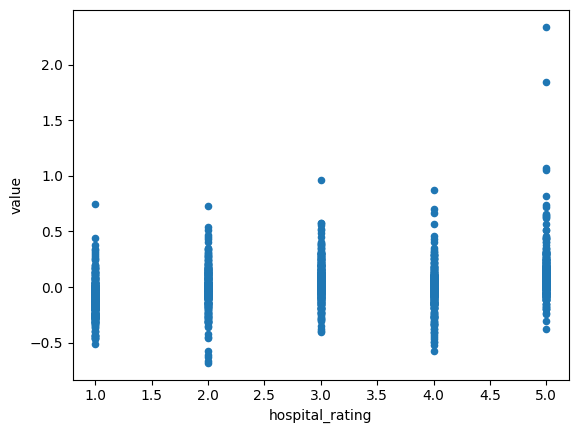

In [95]:
# Visualization of correlation between hospital rating and increase in average medicare payment

CMS.plot.scatter(x='hospital_rating',y='value')

In [96]:
# Moderate correlation between hospital rating and increase in average medicare payment

CMS[['hospital_rating', 'value']].corr()

,hospital_rating,value
hospital_rating,1.000000,0.363463
value,0.363463,1.000000
